In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
ffqdc=pd.read_csv('../nhanes-2005-2006/FFQDC_D.csv',index_col=0)
varlook=pd.read_csv('../nhanes-2005-2006/VARLK_D.csv',index_col=0)
foodlook=pd.read_csv('../nhanes-2005-2006/FOODLK_D.csv',index_col=0)

/Users/nicolaslee/py3env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# 1. Compute average frequencies for each food

In [5]:
foodlookFrequencies=ffqdc.groupby('FFQ_FOOD').mean().drop(columns='SEQN')

In [6]:
foodlookFrequencies.head()

,FFQ_VAR,FFQ_FREQ,FFQ_CODE
FFQ_FOOD,,,
1.0,16.0,0.314703,0.030869
2.0,16.0,0.424774,0.010417
3.0,16.0,0.417114,0.001838
4.0,16.0,0.442877,0.003425
5.0,16.0,0.389043,0.008696


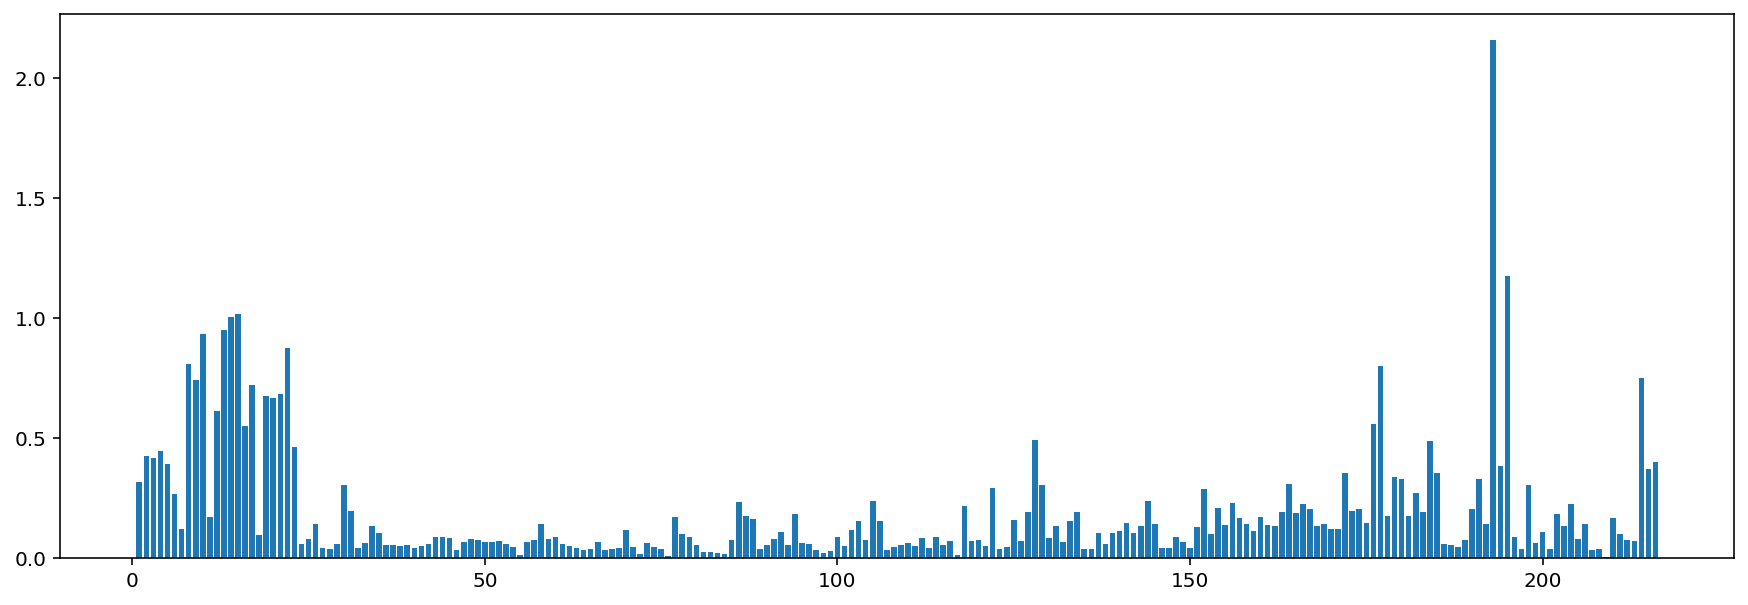

In [7]:
fig,ax=plt.subplots(figsize=(15,5))
ax.bar(foodlookFrequencies.index,foodlookFrequencies['FFQ_FREQ']);

# Comparing varlook and foodlook

In [8]:
def findInFoodlook(key):
    ids=[]
    for i,e in enumerate(foodlook['VALUE']):
        if key in e.lower():
            print(e)
            ids.append(foodlook.loc[i]['FFQ_FOOD'])
    return ids

def findInVarlook(key):
    ids=[]
    for i,e in enumerate(varlook['VALUE']):
        if key in e.lower():
            print(e)
            ids.append(varlook.loc[i]['FFQ_VAR'])
    return ids

In [13]:
print('Varlook')
varlookMilk = findInVarlook('milk')

print('\nFoodlook')
foodlookMilk = findInFoodlook('milk')

Varlook
Milk (as a beverage)
Milk on cereal
Milk added to Coffee/Tea

Foodlook
Milk/ whole in cereal
Milk/ 2% in cereal
Milk/ 1% in cereal
Milk/ nonfat/skim in cereal
Milk/ soy/ in cereal
Milk/ rice/ in cereal
Milk/ whole to drink
Milk/ 2% to drink
Milk/ 1% to drink
Milk/ nonfat to drink
Milk/ soy/ to drink
Milk/ rice/ to drink
Milk/ whole in coffee or tea
Milk/ 2% in coffee or tea
Milk/ 1% in coffee or tea
Milk/ nonfat/skim in coffee or tea
Milk/ evap/cond in coffee or tea
Milk/ soy in coffee or tea
Milk/ rice in coffee or tea
Ice cream/ice milk/ lowfat
Milk, unpasteurized not in coffee/tea
Milk, unpasteurized in cereal
Milk, unpasteurized in coffee/tea
Milk/ other to drink
Milk/ other in cereal
Milk/ other in coffee/tea


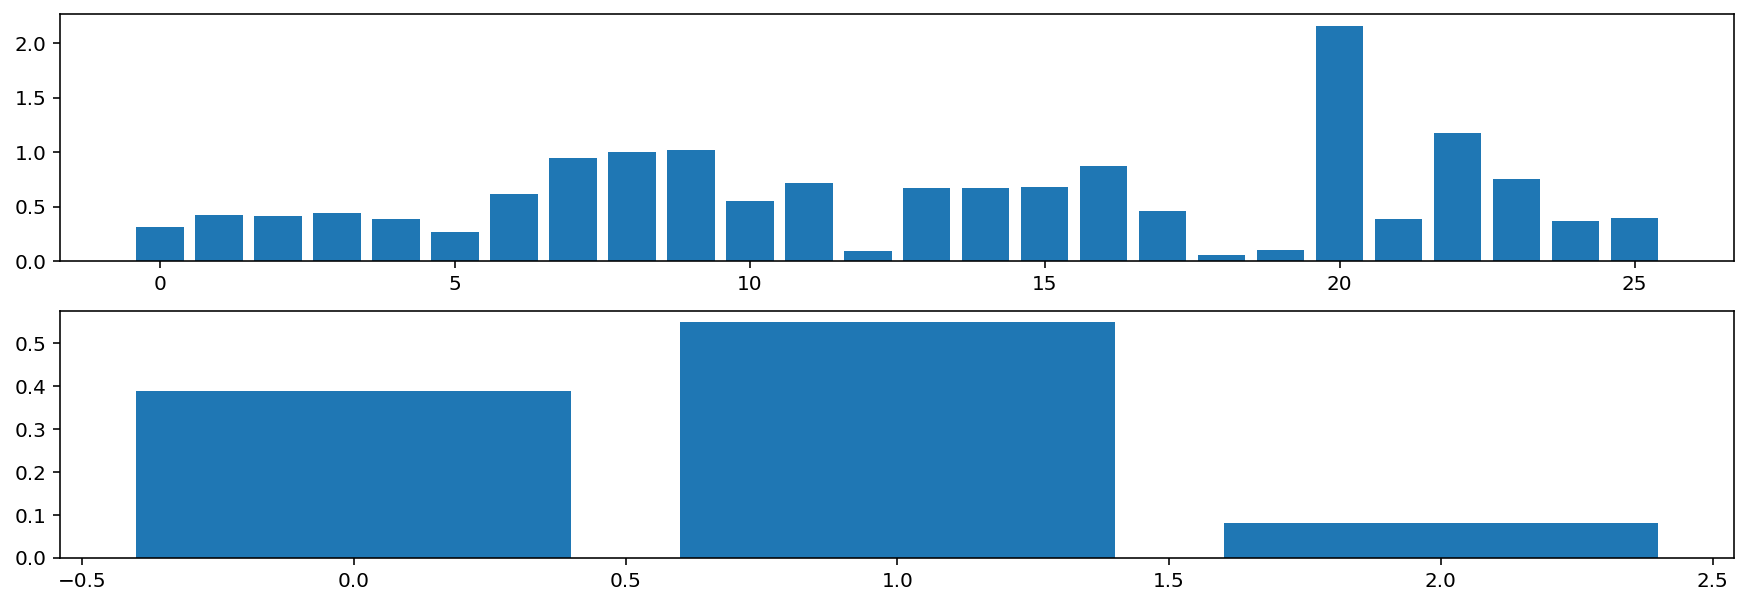

In [12]:
foodlookMilkFrequencies = foodlookFrequencies.loc[foodlookMilk]

fig,ax=plt.subplots(2,figsize=(15,5))
ax[0].bar(list(range(len(foodlookMilkFrequencies))),foodlookMilkFrequencies['FFQ_FREQ']);

varlookFrequencies=ffqdc.groupby('FFQ_FOOD').mean().drop(columns='SEQN')
varlookMilkFrequencies = varlookFrequencies.loc[varlookMilk]
ax[1].bar(list(range(len(varlookMilkFrequencies))),varlookMilkFrequencies['FFQ_FREQ']);

# When examining milk data, FOODLOOK provides greater specificity
* for example, differentiating between different types of milk, while varlook only identifies what the milk is consumed with